In [1]:
import Pkg; Pkg.activate("..")
using Revise
using TEQUILA
using Equilibrium
using MillerExtendedHarmonic
using Optim
using Plots
using BenchmarkTools
using LinearAlgebra
using FiniteElementHermite

  Activating project at `~/.julia/dev/TEQUILA`
┌ Info: Precompiling TEQUILA [a60c9cbd-e72f-4185-96b6-b8fc312c4d37]
└ @ Base loading.jl:1423


In [2]:
Ψ, _ = read_geqdsk("../sample/g_chease_mxh", clockwise_phi=false)
Rbnd = [1.4835178156219313, 1.4751077671753525, 1.4602394328985497, 1.4388380419389455, 1.4108807338529168, 1.3764483277806405, 1.3357804753627627, 1.2893244149041314, 1.2377668623272875, 1.1820398871874687, 1.1232951972509257, 1.0628467019418477, 1.0020874242222966, 0.9423921857519185, 0.8850204560024655, 0.8310334333940519, 0.7812359419834862, 0.7361481974776741, 0.6960065889264038, 0.6607879267949847, 0.6302491076665837, 0.6039739971357191, 0.581420982624028, 0.5619671697773423, 0.544947663954185, 0.5296901416465357, 0.515545712237456, 0.5019169852256711, 0.48828360010109495, 0.4742246220125431, 0.4594364798717472, 0.44374473391905406, 0.4271079981748529, 0.409612810526308, 0.39145907858607404, 0.37293682088983754, 0.35439610416262285, 0.3362131315257383, 0.3187561275885247, 0.30235480008510673, 0.28727665162877747, 0.27371234360083185, 0.26177090083856946, 0.2514841006517634, 0.24281821459282615, 0.23569057230552082, 0.22998825597144357, 0.22558653443943544, 0.22236523847997325, 0.22022196524730508, 0.21908161380297597, 0.21890219366643027, 0.21967708989569368, 0.22143404980091086, 0.22423115491890488, 0.22815004304607933, 0.23328671710624138, 0.2397404522109191, 0.24760157626101642, 0.25693919736484827, 0.26779019905703894, 0.2801509311967597, 0.29397291970282646, 0.30916357450299925, 0.3255923216264419, 0.3431019063582449, 0.36152392991750903, 0.380697117889242, 0.4004864731636038, 0.42080138642476533, 0.44161095015067714, 0.4629550828808725, 0.48495052398367755, 0.5077912058015006, 0.531742869974298, 0.5571320250991906, 0.5843294476842027, 0.6137284604716512, 0.6457182765253558, 0.6806528923241719, 0.7188164573588416, 0.7603867949570597, 0.8053997480153771, 0.8537180834199077, 0.9050094850040493, 0.9587383009186167, 1.0141748445222794, 1.070424043788906, 1.1264722926505406, 1.181248040399161, 1.2336887703414552, 1.2828053785623097, 1.3277351004668447, 1.3677760954530462, 1.4024001249678741, 1.4312436339749626, 1.4540810908128134, 1.4707869822179531, 1.4812940883304169, 1.4855556251025055, 1.4835178156219313]
Zbnd = [-0.06745063500000004, -0.1390018250113284, -0.21027063516431138, -0.2809758000248973, -0.35083827860949884, -0.41958235563227286, -0.4869367296273919, -0.5526355836519838, -0.6164196343441647, -0.6780371551960134, -0.7372449700030954, -0.7938094125698445, -0.8475072488832859, -0.898126558115698, -0.945467568979303, -0.9893434481322729, -1.0295810375245735, -1.0660215377736795, -1.0985211348731885, -1.1269515677610018, -1.1512006345071417, -1.1711726351235048, -1.1867887492479983, -1.1979873472124964, -1.2047242332669859, -1.2069728200000003, -1.2047242332669859, -1.1979873472124964, -1.1867887492479983, -1.1711726351235052, -1.1512006345071417, -1.1269515677610022, -1.0985211348731885, -1.0660215377736795, -1.0295810375245738, -0.9893434481322729, -0.945467568979303, -0.8981265581156979, -0.8475072488832861, -0.7938094125698448, -0.7372449700030955, -0.6780371551960134, -0.6164196343441646, -0.5526355836519841, -0.48693672962739215, -0.419582355632273, -0.3508382786094989, -0.2809758000248973, -0.2102706351643117, -0.13900182501132863, -0.06745063500000018, 0.004100555011328291, 0.07536936516431134, 0.14607453002489693, 0.21593700860949855, 0.2846810856322726, 0.3520354596273918, 0.4177343136519837, 0.4815183643441642, 0.5431358851960131, 0.6023437000030951, 0.6589081425698444, 0.7126059788832859, 0.7632252881156976, 0.810566298979303, 0.8544421781322727, 0.8946797675245731, 0.9311202677736794, 0.9636198648731881, 0.9920502977610021, 1.0162993645071414, 1.036271365123505, 1.0518874792479984, 1.0630860772124961, 1.0698229632669856, 1.07207155, 1.0698229632669856, 1.0630860772124961, 1.0518874792479984, 1.036271365123505, 1.0162993645071419, 0.9920502977610023, 0.9636198648731883, 0.9311202677736796, 0.8946797675245733, 0.8544421781322731, 0.8105662989793033, 0.7632252881156979, 0.7126059788832861, 0.6589081425698444, 0.6023437000030956, 0.5431358851960139, 0.4815183643441646, 0.41773431365198405, 0.35203545962739174, 0.284681085632273, 0.21593700860949944, 0.14607453002489734, 0.07536936516431175, 0.004100555011328194, -0.06745063499999976]
bnd = MXH(Rbnd, Zbnd, 5)
shot = Shot(21, 21, bnd, Ψ);

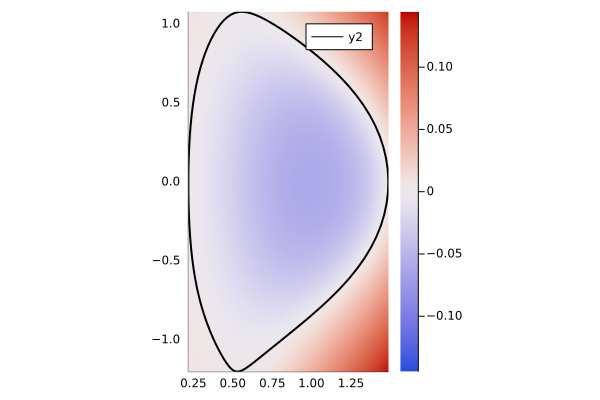

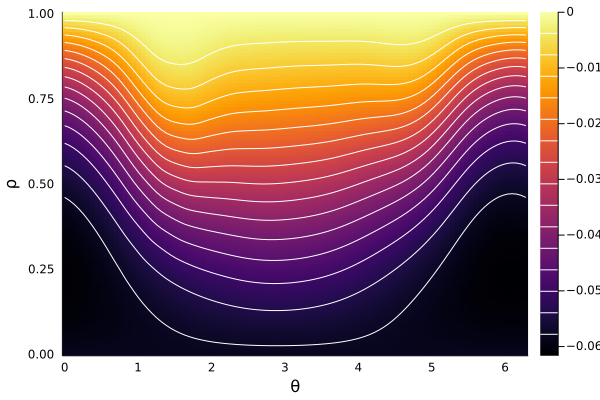

In [3]:
Rs = range(minimum(Rbnd), maximum(Rbnd), 129)
Zs = range(minimum(Zbnd), maximum(Zbnd), 129)
P = [Ψ(r,z) for z in Zs, r in Rs]
cmax = maximum(abs.(P))
p = heatmap(Rs, Zs, P, aspect_ratio=:equal, c=:diverging, clim=(-cmax,cmax))
plot!(Rbnd, Zbnd, color=:black, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
display(p)
plot_shot(shot, :ρθ)

In [1]:
function res_zmin(ρ::Real, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, Z::Real)
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    a = R0 * ϵ
    b = κ * a
    return (Z0 + sign(Z>Z0) * b - Z)^2
end


function res_find_ρ(ρ::Real, R0fe::FE_rep, Z0fe::FE_rep, ϵfe::FE_rep, κfe::FE_rep, c0fe::FE_rep,
                cfe::AbstractVector{<:FE_rep}, sfe::AbstractVector{<:FE_rep}, R::Real, Z::Real; return_θ=false)
    
    R0 = R0fe(ρ)
    Z0 = Z0fe(ρ)
    ϵ = ϵfe(ρ)
    κ = κfe(ρ)
    
    a = R0 * ϵ
    b = κ * a
    
    aa = (Z0 - Z) / b
    aa = max(-1, min(1, aa))
    θo = asin(aa)
    θi = sign(θo) * π - θo
    
    c0 = c0fe(ρ)
    
    θro = θo + c0
    θri = θi + c0
    @inbounds for m in eachindex(cfe)
        S = sfe[m](ρ)
        C = cfe[m](ρ)
        θro += dot((S, C), sincos(m * θo))
        θri += dot((S, C), sincos(m * θi))
    end
    dR = R0 - R
    reso =  (dR + a * cos(θro))^2
    resi =  (dR + a * cos(θri))^2
    if reso < resi
        return_θ ? (return θo) : (return reso)
    else 
        return_θ ? (return θi) : (return resi)
    end

end

function ρθ_RZ(R0::FE_rep, Z0::FE_rep, ϵ::FE_rep, κ::FE_rep, c0::FE_rep, 
               c::AbstractVector{<:FE_rep}, s::AbstractVector{<:FE_rep}, R::Real, Z::Real)
    
    f_zmin(x) = res_zmin(x, R0, Z0, ϵ, κ, Z)
    ρ_zmin = optimize(f_zmin, 0.0, 1.0).minimizer
    
    f_find_ρ(x) = res_find_ρ(x, R0, Z0, ϵ, κ, c0, c, s, R, Z)
    res = optimize(f_find_ρ, ρ_zmin, 1.0)#, rel_tol=1e-4, abs_tol=1e-8)
    #println(res)
    ρ = res.minimizer
    θ = res_find_ρ(ρ, R0, Z0, ϵ, κ, c0, c, s, R, Z, return_θ=true)
    return ρ, θ
end;

LoadError: UndefVarError: FE_rep not defined

In [11]:
R = 1.0
Z = 0.5
println(Ψ(R,Z))
surfaces = surfaces_FE(shot)
R0s, Z0s, ϵs, κs, c0s, cs, ss = surfaces
ρ, θ = ρθ_RZ(R0s, Z0s, ϵs, κs, c0s, cs, ss, R, Z)
println((ρ, θ))
println(psi_ρθ(shot, ρ, θ))

-0.041399479924064064
(0.6266518312814745, -0.91844016582011)
-0.04139819216462809


In [12]:
#63.172 ns (1 allocation: 16 bytes)
#48.635 μs (5 allocations: 352 bytes)
@time Ψ(R,Z)
@btime ρθ_RZ(R0s, Z0s, ϵs, κs, c0s, cs, ss, R, Z)

  0.000008 seconds (1 allocation: 16 bytes)
  12.715 μs (5 allocations: 352 bytes)


(0.6266518312814745, -0.91844016582011)

In [13]:
@time res_find_ρ(0.5, R0s, Z0s, ϵs, κs, c0s, cs, ss, R, Z, return_θ=true)

  0.007837 seconds (73 allocations: 3.500 KiB, 99.65% compilation time)


-1.4807088413639118

In [14]:
function g(shot, R0s, Z0s, ϵs, κs, c0s, cs, ss, r, z)
    ρ, θ = ρθ_RZ(R0s, Z0s, ϵs, κs, c0s, cs, ss, r, z)
    return psi_ρθ(shot, ρ, θ)
end
function G(shot, R0s, Z0s, ϵs, κs, c0s, cs, ss, Rs, Zs)
    return [g(shot, R0s, Z0s, ϵs, κs, c0s, cs, ss, r,z) for z in Zs, r in Rs]
end
function Psi(Ψ, Rs, Zs)
    return [Ψ(r, z) for z in Zs, r in Rs]
end

Psi (generic function with 1 method)

  1.294038 seconds (161.61 k allocations: 12.638 MiB)


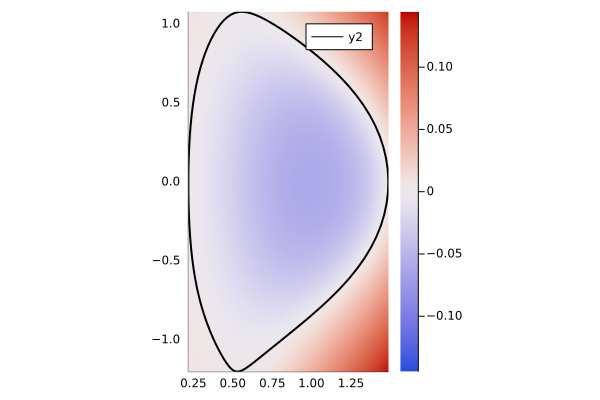

  0.002718 seconds (2 allocations: 315.734 KiB)


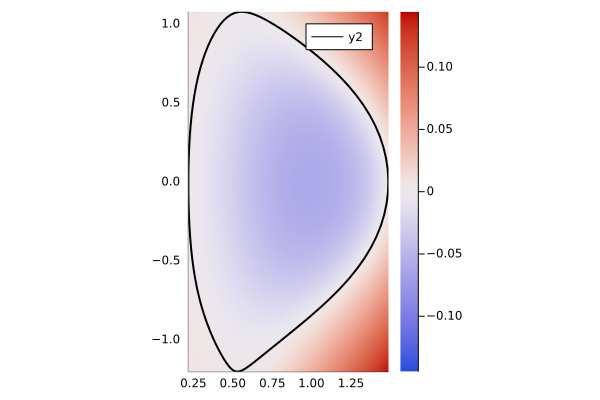

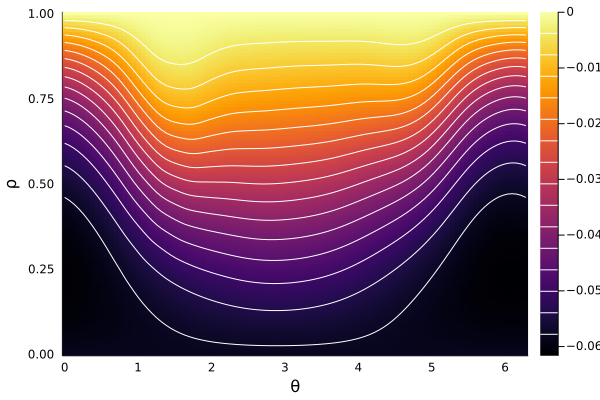

In [16]:
Rs = range(minimum(Rbnd), maximum(Rbnd), 201)
Zs = range(minimum(Zbnd), maximum(Zbnd), 201)
@time P1 = G(shot, R0s, Z0s, ϵs, κs, c0s, cs, ss, Rs, Zs)
cmax = maximum(abs.(P1))
p1 = heatmap(Rs, Zs, P1, aspect_ratio=:equal, c=:diverging, clim=(-cmax,cmax))
plot!(Rbnd, Zbnd, color=:black, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
display(p)
@time P2 = Psi(Ψ, Rs, Zs)
cmax = maximum(abs.(P2))
p1 = heatmap(Rs, Zs, P2, aspect_ratio=:equal, c=:diverging, clim=(-cmax,cmax))
plot!(Rbnd, Zbnd, color=:black, lw=2, xrange=(Rs[1], Rs[end]), yrange=(Zs[1], Zs[end]))
display(p)

plot_shot(shot, :ρθ)